# Documentation, Pipes, Mutate, and Summarize

- Last class there was a question about what the different types of position arguments were
- We talked about position dodge and position jitter
- Another plug for: https://ggplot2.tidyverse.org/reference/

## Pipes

- Chapter 18 in your book is a very good reference for these, I highly recommend checking it out
- https://r4ds.had.co.nz/pipes.html
- The output of the function on the left goes through the pipe and into the function on the right

## Mutate

- https://www.rdocumentation.org/packages/dplyr/versions/0.5.0/topics/mutate
- Mutate adds new variables to your dataset, and preserves existing ones
- Transmute adds new variables to your dataset, but does not preserve existing ones

In [2]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [6]:
# Answers the question: What is the average mpg of the vehicle across both city and highway driving?

mpg %>% 
    mutate(avg_gas = (cty + hwy) / 2) %>% 
    head()

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_gas
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,22.0


In [7]:
mpg %>% 
    transmute(avg_gas = (cty + hwy) / 2) %>% 
    head()

avg_gas
23.5
25.0
25.5
25.5
21.0
22.0


In [8]:
mpg %>% 
    mutate(avg_gas = (cty + hwy) / 2) %>%
    select(avg_gas) %>% 
    head()

avg_gas
23.5
25.0
25.5
25.5
21.0
22.0


In [27]:
# Answers the question: What is the volume of each diamond?

diamonds %>% 
    mutate(vol = x*y*z) %>% 
    head()

carat,cut,color,clarity,depth,table,price,x,y,z,vol
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43,38.20203
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31,34.50586
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31,38.07688
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63,46.72458
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75,51.91725
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48,38.69395


In [15]:
ifelse(FALSE, "The condition was true", "No, it was not True")

[1] "No, it was not True"

In [28]:
# Fixes the data to adjust for a change in reporting standards

mpg %>% 
    mutate(hwy = ifelse(year < 2000, hwy + 1, hwy)) %>% 
    head()

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,30,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,30,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,27,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,27,p,compact


## Summarize and Group_by
- Used to calculate summary statistics
- Very often paired with group_by
- Summarize calculates a single value per group, mutate calculates a single value per row

In [18]:
?group_by
?summarize

In [29]:
diamonds  %>%  tail()

carat,cut,color,clarity,depth,table,price,x,y,z
0.72,Premium,D,SI1,62.7,59,2757,5.69,5.73,3.58
0.72,Ideal,D,SI1,60.8,57,2757,5.75,5.76,3.50
0.72,Good,D,SI1,63.1,55,2757,5.69,5.75,3.61
0.70,Very Good,D,SI1,62.8,60,2757,5.66,5.68,3.56
0.86,Premium,H,SI2,61.0,58,2757,6.15,6.12,3.74
0.75,Ideal,D,SI2,62.2,55,2757,5.83,5.87,3.64


In [30]:
diamonds  %>% 
    group_by(color) %>% 
    tail()

carat,cut,color,clarity,depth,table,price,x,y,z
0.72,Premium,D,SI1,62.7,59,2757,5.69,5.73,3.58
0.72,Ideal,D,SI1,60.8,57,2757,5.75,5.76,3.50
0.72,Good,D,SI1,63.1,55,2757,5.69,5.75,3.61
0.70,Very Good,D,SI1,62.8,60,2757,5.66,5.68,3.56
0.86,Premium,H,SI2,61.0,58,2757,6.15,6.12,3.74
0.75,Ideal,D,SI2,62.2,55,2757,5.83,5.87,3.64


In [26]:
diamonds  %>% 
    group_by(color) %>%
    group_vars()

[1] "color"

In [69]:
# Answers the question: Does color affect the average price of a diamond?

diamonds %>% 
    group_by(color) %>%
    summarize(avg_price = mean(price),
             median_price = median(price))

color,avg_price,median_price
D,3169.954,1838.0
E,3076.752,1739.0
F,3724.886,2343.5
G,3999.136,2242.0
H,4486.669,3460.0
I,5091.875,3730.0
J,5323.818,4234.0


In [36]:
diamonds %>% 
    group_by(color) %>%
    transmute(avg_price = mean(price))

color,avg_price
E,3076.752
E,3076.752
E,3076.752
I,5091.875
J,5323.818
J,5323.818
I,5091.875
H,4486.669
E,3076.752
H,4486.669


In [37]:
diamonds %>% 
    group_by(color) %>%
    transmute(avg_price = mean(price))  %>% 
    unique() %>% 
    arrange(color)

color,avg_price
D,3169.954
E,3076.752
F,3724.886
G,3999.136
H,4486.669
I,5091.875
J,5323.818


In [40]:
mpg %>% 
    group_by(manufacturer) %>% 
    summarize(mean(cty + hwy))

manufacturer,mean(cty + hwy)
audi,44.05556
chevrolet,36.89474
dodge,31.08108
ford,33.36000
honda,57.00000
hyundai,45.50000
jeep,31.12500
land rover,28.00000
lincoln,28.33333
mercury,31.25000


## Exercises

In [63]:
superbowl <- read_csv("https://raw.githubusercontent.com/fivethirtyeight/superbowl-ads/main/superbowl-ads.csv")
# https://github.com/fivethirtyeight/superbowl-ads

Parsed with column specification:
cols(
  year = col_double(),
  brand = col_character(),
  superbowl_ads_dot_com_url = col_character(),
  youtube_url = col_character(),
  funny = col_logical(),
  show_product_quickly = col_logical(),
  patriotic = col_logical(),
  celebrity = col_logical(),
  danger = col_logical(),
  animals = col_logical(),
  use_sex = col_logical()
)


In [61]:
superbowl  %>% head()

year,brand,funny,show_product_quickly,patriotic,celebrity,danger,animals,use_sex
2006,Bud Light,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
2006,Budweiser,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
2006,Bud Light,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
2006,Budweiser,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE
2006,Pepsi,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE
2006,Pepsi,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE


## Remember filter, arrange and select?
- Recreate the superbowl data so that only superbowls from 2006 and on are represented, the data is arranged by year, and the url columns are no longer included. Save this data as superbowl and use it for future questions.

## Make a barplot representing how many ads each brand used
- Add a theme of your choice. See how it changes the plot.

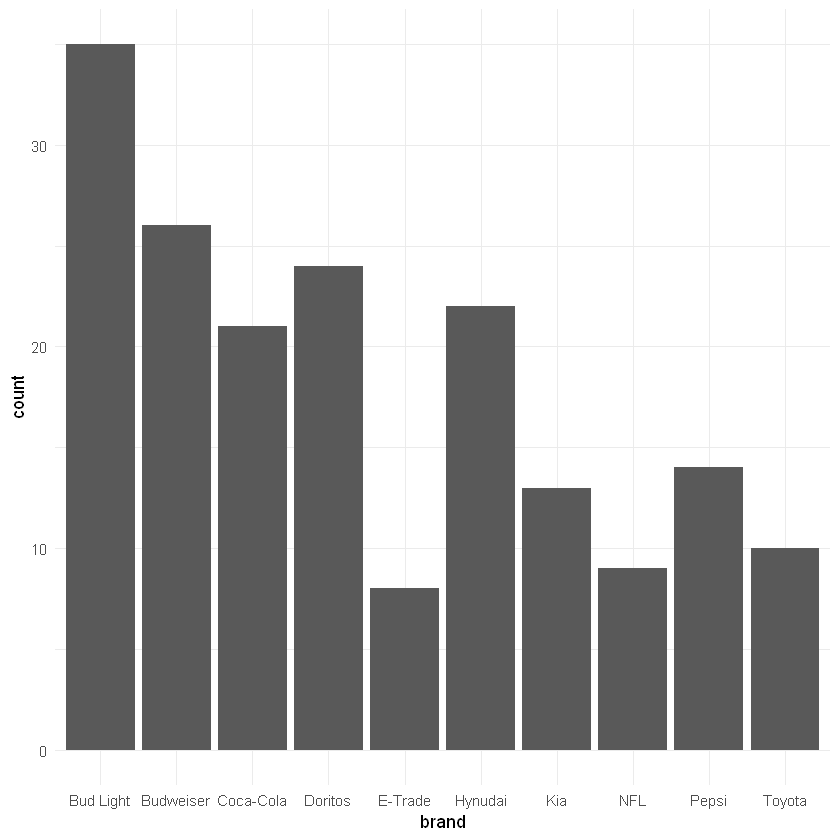

## Use group by and summary to see how many ads of each type (quick, patriotic, etc.) the brand uses.
- No need for every category, just make sure you can get it working for a few of your choice
- The sum function is useful here

brand,total_quick,total_patriotic
Bud Light,31,3
Budweiser,18,14
Coca-Cola,15,5
Doritos,21,1
E-Trade,4,2
Hynudai,12,3
Kia,4,2
NFL,6,4
Pepsi,9,2
Toyota,8,2


## This question is harder: 
- Find out how to create the below dataset, then create the below barplot. The functions I used to create the data were transmute, sum, unique, and gather. We haven't seen gather before, so you might need to look up the documentation to get an idea for what it does. For plotting, remember about the stat that is appropriate for this case.

category,count
t_funny,113
t_quick,128
t_patriotic,38
t_celebrity,53
t_danger,56
t_animals,67
t_sex,37


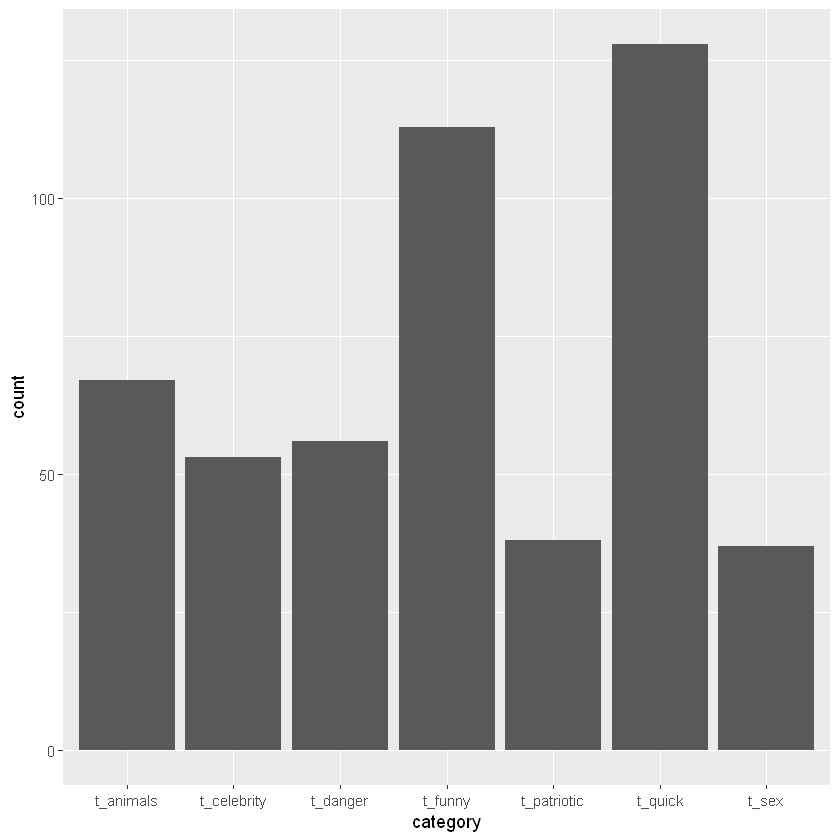

##  Recreating summary()
- Use transmute to recreate the summary(diamonds$price)) output without the quantiles. Then add standard deviation.
- Unique() is helpful for this

In [89]:
summary(diamonds$price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    326     950    2401    3933    5324   18823 

Min,Median,Mean,Max,SD
326,2401,3932.8,18823,3989.44
